# Social Finance (online appendix and notes)
**Jonathan Conning**,
Department of Economics, 
Hunter College and The Graduate Center, 
City University of New York

**Jonathan Morduch**, 
NYU Wagner Graduate School of Public Service

*This is a Jupyter Notebook to accompany the paper that offers a summary of main arguments and python code for simulations/visualizations in the paper.*

**Abstract:**  We propose a framework for understanding how social investors’ who seek to maximize a combination of private and social returns from investments in a portfolio of new and established microfinance institutions.  The model takes into account the endogeneity of loan contract terms as well as the capital structure of the financial institutions that may emerge to serve target groups of borrowers differentiated primarily by their levels of initial average net worth, and how social investments might transform those patterns. We build upon one of the workhorse models of modern corporate finance (Tirole, 2007) which features limited liability, multiple layers of moral hazard and costly monitoring to explain patterns of financial intermediation, and in our framework, the role and modes of social investment.  We pinpoint the role of the subsidies and guarantees implicit in social investors’ equity and quasi-equity investments and the role they play in attracting private capital investors and sustaining productivity-enhancing financial intermediation that might otherwise not have taken place. 

# Introduction

...We tackle the logic and tensions inherent in social finance—the support, with philanthropic objectives, of nonprofits, social businesses like the Grameen Bank, and profit-maximizing businesses serving the poor. The principles behind the new world of philanthropy and social action have not been well-explored by economists. We develop a theory of “social finance” to parallel the modern theory of corporate finance... 


We extend a model of capital constraints and financial intermediation with active monitors similar to Holmstrom and Tirole (1997), Conning (1999), but extends the model to focus on how bank capital structure varies across banks depending on the monitoring-intensity of their loan portfolio (determined in turn by the average net worth of its borrowers) and the role that social investors may play in creating and expanding loan access via structured finance. 

This model itself is built upon a simple model of credit rationing due to borrower moral hazard and limited liability, the 'workhorse' model of Tirole's (2006) *The Theory of Corporate Finance*.  Risk-neutral entrepreneurs have access to an investment project which requires a lump-sum investment $I$ to get started, but they do not have liquid funds so they seek to borrow the entire amount from financial intermediaries. The problem of moral hazard will dictate that optimal contracts must reward project success more highly than project failure in order to give entrepreneurs an incentive to want to increase the probability of success.  Under many plausible parameter scenaries te optimal contract will require that loan repayments in the failure state(s) be met out of assets that are additional or 'collateral' to the generated project returns.  Lenders will find it unprofitable to lend to any borrower who cannot credibly pledge assets below a minimum collateral requirement $\underline A$.  A simple graphical analysis of this collateral based lending model is laid out in a notebook [here](basicmodel.ipynb)

Local intermediaries may be able in 'active monitoring' that directly lowers borrowers' scope for moral hazard, lowering the minimum collateral requirements necessary to attract outside investors, thereby expanding capital access.  But monitoring is a costly activity that is itself subject to moral hazard. For this reason an optimal contract will require monitoring intermediaries to have enough of their own capital at risk in a loan so as to provide incentives to appropriately monitor to protect any outside investor's interests. 

In contrast to the earlier mentioned papers, in this paper we posit the idea that local intermediary monitoring capacity is neighborhood-specific, and neighborhoods are largely segregated by the average level of pledgeable assets of its residents.  This leads us to a focus on the optimal capital structure of neighborhood-specific banks (or more broadly to the optimal capital structure of different types of banks, depending on the monitoring intensity of their loan portfolio). 

There are up to four types of agents in the model:

1. risk-neutral entrepreneur households that can run small businesses if they are able to cover lump sum $I$. Household differ in terms of their initial pledgeable assets $A$ (tied up in other projects but can be liquidated at a cost to cover obligations. 
2. one or more local financial intermediaries in each neighborhood, wholly or partly owned and managed by locally informed equity investors. These financial institutions may lend out of their own equity capital. Their own at risk investment in a particular entreprenneur's project is labeled $I^m$ to indicate that they monitor to try to limit scope for moral hazard.
3. private uninformed investors (possibly including savings depositors). 
4. Finally, social investors may be able to affect the nature and depth of the above relationsips through additional investments, subsidies and guarantees of their own. 

Entrepreneurs in neighborhood $j$ have pledgeable assets $A_j$ (assets that are tied up in other productive uses but could be liquidated to pay off a loan).  Depending on the characteristics of the loan projects and the level of $A_j$ the model generates one of four types of lending structures: 

Depending on their initial holding of $A$ and parameters of the problem, entrepreneurs will in the end be either:
1. not funded
2. funded only by a non-leveraged local intermediary, so $I = I^m$
3. funded by a leveraged intermediary: so $I = I^m + I^u$

The model can be closed so that, depending on the characteristics of loans, the initial distribution of pledgeable assets across neighborhoods and entrepreneurs,  and the economy-wide levels of intermediary and uninformed capital we can predict the rate of return on uninformed and intermediary capital as well as bank capital structure and loan terms across the population.



### Model code

Many of the functions used to simulate and visualize the model below are written up in python in a [socialfinance](socialfinance.py) module.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from socialfinance import Bank

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.rcParams['figure.figsize'] = (8.0, 8.0)

## Model parameters

In [3]:
A = np.linspace(0,120,500)  # Asset space

mfi = Bank(A, 1.2)     # This creates an mfi object with attributes and methods
mfi.print_params()     # display default scalar parameters

Amax = 120, B0 = 30, F = 20, I = 100, K = 12000, X = 200, alpha = 0.4, beta = 1.2, gamma = 1.0, p = 0.97, q = 0.8, 

**Intermediary fixed cost per borrower**

The model allows for the possibility of fixed costs per loan and fixed costs per bank for possible later use, but we'll start the model analysis by setting fixed costs to zero.

**Monitoring technology:** We assume a linear relationship betweeen monitoring intensity $m$ (=monitoring expense) and the extent of moral hazard as captured by the  private benefits $B(m)$ the client stands to capture from non-diligence. 

$$B(m) = B_0 - \alpha \cdot m$$

### Neighborhoods, Entrepreneurs and assets 
There are $J$ neighborhoods with $N$ enterepreneurs per neighborhood. The neighborhoods are segregated by pledgeable assets or wealth (and to simplify, everyone in a particular neighborhood has the same level of assets as all their neighbors.  A household:

 - in the poorest neighborhood has pledgeable assets $A=0$
 - in the richest neighborhood has $A=A^{max}$
 - in neighborhood $j$ has pledgeable assets $A_j = j \cdot \frac{A^{max}}{J}$


Each of the $N$ would-be entrepreneurs in each of the $J$ neighborhoods has potential demand for lump sum investment $I$, so total potential demand is $\bar{K} = N \cdot J \cdot I$


To make the problem interesting we'll start with not enough local intermediary monitoring capital to satisfy this total demand which means financial intermediaries and entrepreneurs will try to raise the remaining funds on the market for uninformed capital.  Uninformed capital investors will participate as long as they can expect to earn the opportunity cost of funds $r$. 

Let's summarize a few things in our concrete example:

### Minimum collateral requirements

#### Minimum collateral for a no-monitoring lender

An uninformed lender cannot observe whether the entrepreneur has been diligent (chose project $p$) or not (chose project $q$ and got private benefit $B(0)$). They will insist the contract provide incentives to diligence:

$$E(s|p) \ge E(s|q) + B(0)$$

or

$$(s_s - s_f) \ge \frac{B(0)}{p-q}$$

If limited liability puts a lower bound on how small of $s_f=-A$ (where $A$ are the entrepreneur's pledgeable assets) then this implies a borrower with pledgeable assets $A$ earns a 'limited liability' rent of: 

$$E(s|p)= -A + p\frac{B(0)}{p-q}$$

Less well-off entrepreneurs with smaller $A$ must earn higher rents to maintain incentives.  Intuitively, since limited liability limits how much they can be punished for failure outcomes, incentives can only be maintained by keeping repayments low in sucess states, but this is costly to the lender.

The lender must be able to cover this rent and her opportunity cost of funds $\gamma I$ and fixed costs per loan.  For now we indicate fixed costs simply as $F$ but note that we'll later break this into fixed costs at the loan level (e.g. minimum cost of processing a loan, regardless of organization size) and organization-level fixed costs (average fixed costs will decline with organization size).

So a lender will just be able to break even and be willing to participate when the poorest borrower has assets :

$$E(x|p) - E(s|p) = \gamma \cdot I + \gamma F$$

$$E(x|p)  + A  - p\frac{B(0)}{p-q} = \gamma \cdot I + \gamma F$$

Solving for the $A$ as a function of $m$ where this exactly holds gives us the **minimum collateral requirement for a no-monitoring or uninformed lender** who has opportunity cost of funds $\gamma$ but cannot monitor.


$$\underline A^u(0) = \frac{p \cdot B(0)}{p-q} 
 - \left[ {pX - \gamma I} \right] + \gamma F$$

If a borrower has pledgeable assets $A$ in excess of the minimum collateral required by an uninformed lender $\underline A(0,N)$ then they'll pledge $\underline A(0,N)$ and borrow entirely from the uninformed lender, so $I = I^u$ and the cost of funds to the borrower in this competitive environment will be $\gamma$

Entrepreneurs with $A \lt \underline A(0,N)$ will have no choice but to try to borrow via a more expensive monitoring local intermediary.

#### Minimum collateral for a monitoring lender
A monitoring intermediary has the advantage of being able to monitor to directly lower the scope for moral hazard via $B(m)$ but they charge a higher cost of funds because (a) they face a higher opportunity cost of funds $\beta > \gamma$ and because (b) they must also be compensated for the cost of monitoring $m$.

Monitoring lowers the private benefit from non-diligence:

$$E(s|p)= -A + p\frac{B(m)}{p-q}$$

but monitoring adds a cost that must be paid for:

$$E(x|p) - E(s|p) = \gamma \cdot I + m + \gamma F$$

The expression below shows how monitoring intensity $m$ can lower the collateral requirement for a monitoring intermediary when they are the only lender:

**Non-leveraged or Equity-only MFI**

$$\underline A^e(m) = \frac{p \cdot B(m)}{p-q} - \left[ {pX - \beta I} \right] + \gamma F + m $$
 
Note that as monitoring $m$ must be paid for out of available project surplus, which reduces what is left to the entrepreneur after making all necessary repayments, the parties will in want the minimum amount of monitoring possible.   That is they'll choose a monitoring intensity $m=m(A)$ that just brings the monitoring minimum collateral requirement down in line with available pledgeable assets $A$:

$$\underline A^e(m(A)) = A$$

A closed form solutions for $m(A)$ is found below.

**Leveraged MFI**

If the local intermediary MFI can leverage outside capital it can potentially substitute cheaper outside financing for more expensive local intermediary (equity) financing. 

An outside lender will however only participate in a financing structure if it can be sure the monitoring intermediary has enough 'skin in the game' to have incentive to monitor the loan at the minimum intensity required for expected repayments to cover the uninformed lender's costs.  

A contract allocates claims as $s_i$ to the entrepreneur, $R_i$ to the monitoring lender and $X_i -R_i - s_i$ to the uninformed lender where $i = S, F$.  The monitor's incentive compatibility constraint requires that they earn more from being diligent in monitoring at expense $m$ than not monitoring:

$$R_s \ge R_f + \frac{m}{p-q} $$

The lowest cost way of satisfying the monitor's incentive constraint implies leaving a monitoring rent of:

$$E(R|p) = R_f + p \cdot \frac{m}{p-q}$$ 

to the intermediary.  

Let's assume there is competition for intermediary services in the neighborhood (or same effect, the intermediary earns zero profits, perhaps because they view it as their social mission to reach as many entrepreneurs as possible).  

If the intermediary puts up $I^m$ of the $I$ loan and take first losses then they stand to earn (lose) $R_f = -\beta I^m$ if the project fails and $R_s = -\beta I^m + \frac{m}{p-q}$ if the project succeeds.  Zero profits for intermediaries (i.e. the rent driven to zero) leads to:

$$ p \cdot \frac{m}{p-q} = \beta I^m + m + \beta F $$

Note we assume here the intermediary bears the fixed costs of lending (which will later depend on the scale of lending $N$). Competition drives down the rent and drives up the minimum stake $I^m$ to:

$$ I^m = \frac{1}{\beta} \frac{q \cdot m}{p-q} - F $$


The uninformed lender puts up $I^u = I - I^m$ and the monitor puts up $I^m$.  The last entrepreneur is reached when what is left after paying the borrower their limited liability rent is just enough to pay off both the uniformed and the informed lenders:

$$pX + A - p\frac{B(m)}{p-q} = \gamma (I - I^m) + \beta I^m + \beta F + m $$

solving for $A$ as a function of $m$:

$$\underline A (m) = p \cdot \frac{B(m)}{p-q} 
- \left[ {pX - \gamma I} \right] 
+ \frac{\beta - \gamma}{\beta} \left( \frac{q \cdot m}{p-q} \right )+ \gamma F + m$$


(Note: no mistake here... follow the algebra to see that in a levered contract the fixed costs are valued at opportunity cost $\gamma$)

## Optimal (minimum) monitoring

Monitoring is costly so only so much will be used as needed to lower the minimum collateral requirement to the entrepreneur's pledgeable asset level $A$> 

The minimum collateral requirement above can be rewritten:

$$\underline A (m) = \underline A (0) 
  - m \left [ p \cdot \frac{\alpha}{p-q} - \frac{(\beta - \gamma)}{\beta} \left( \frac{q}{p-q} \right ) -1 \right ]$$

Which means we can solve $\underline A (m) = A$ for:

$$m(A) = \left[ \underline A(0)  - A \right] \cdot
    \frac{\beta(p-q)}{\beta p(\alpha - 1)+\gamma q}$$

If the entrepreneus can only access an equity-only lender:

$$\underline A^e(m) = A$$

Solve for $m$ to get:

$$m^e(A) = \left[ \underline A^e(0)  - A \right] \cdot
    \frac{(p-q)}{ p(\alpha-1)+ q}$$
    
And when $\beta=\gamma$ these two expressions become identical.

When we compare a leveraged loan to an equity-only loan above we see that there is a tradeoff:  by using a leveraged loan some money is saved as we substitute lower cost uninformed capital for more expensive intermediary capital (as $\gamma \le \beta$) but incentive costs rise faster as now we must provide incentives to both the borrower and the monitor. 

In this competitive setting the lender(s) earns zero profits. But we cannot expected project returns exceed the opportunity cost of capital plus monitoring costs. This determines the maximum feasible level of monitoring.  

$$p \cdot X - \beta \cdot I - \beta F - m \ge q \cdot X - \beta \cdot I - \beta F  + B(0)$$

$$m^{max} = (p -q) \cdot X + B(0)$$

The two lines cross at AM(m, β) = AME(m, β) or at:

$$\bar m =  \frac{\beta(I+F)(p-q)}{q}$$

So any entrepreneur with $A<AM(\bar m)$ would be in an equity-only loan.

At zero monitoring it's obviously cheaper to use uninformed capital which has lower cost $\gamma$ rather than borrow from an local intermediary capital which has opportunity cost $\beta$.  Since the latter type of loans are more expensive, they'll also be associated with higher minimum collateral requirements.  Suppose $\beta = 1.2 \cdot \gamma$, then:

In [4]:
mfi.beta = 1.2
print('Ame(0) = {:5.1f}  Am(0) = {:5.1f} '.format(mfi.AMe(0,mfi.beta), mfi.AM(0,mfi.beta)))
print('mcross = {:5.1f}   mmax = {:5.1f}   Amin = {:5.1f}'.format(mfi.mcross(mfi.beta),mfi.mmax(mfi.beta), mfi.Amin(mfi.beta)))

Ame(0) = 121.2  Am(0) =  97.2 
mcross =  30.6   mmax =  50.0   Amin =  57.1


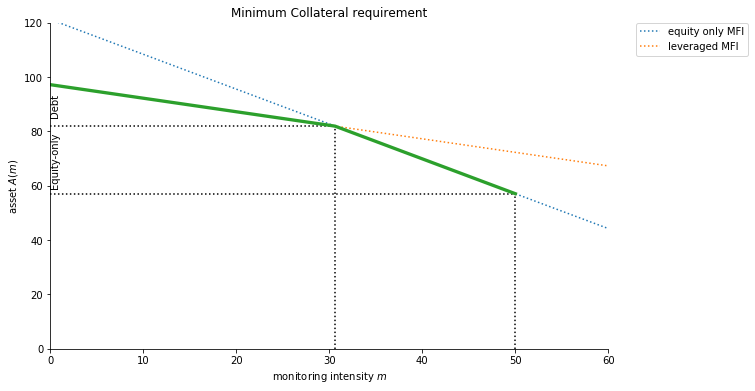

In [5]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
mfi.plotA(mfi.beta)

(NOTE the following calculations assume F= 0)
For any entrepreneur with pledgeable assets $A$ we can find optimal (minimum) amount of monitoring):

$$\underline A^e(m) = A$$
solve for $m$ to get:
 


$$m(A) = \left[ \underline A^e(0)  - A \right] \cdot
    \frac{(p-q)}{ p(\alpha-1)+ q}$$
    
    

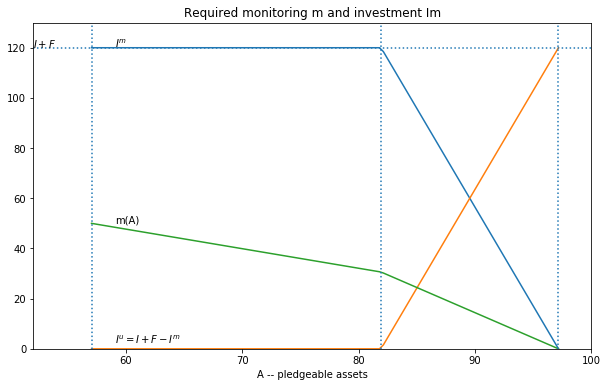

In [6]:
mfi.plotIm(mfi.beta)

G:\jpapers\siv\sfpaper\notebooks\socialfinance.py:170: RuntimeWarning: divide by zero encountered in true_divide
  de = (I + F - Im) / Im


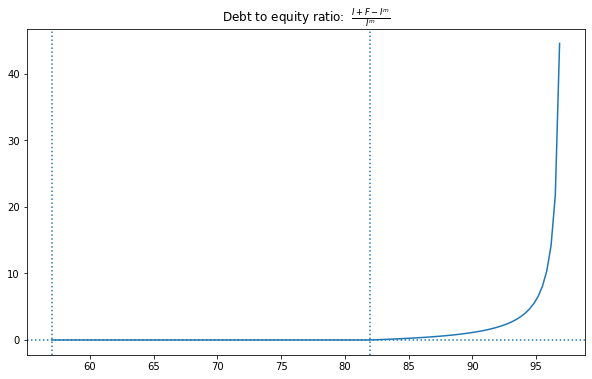

In [7]:
mfi.plotDE(mfi.beta)

## The Entrepreneur's expected return

Is what is left after all others have been paid. 

If it is an equity only loan then the expected return is:

$$E(s|p) = pX - \beta \cdot I  - \beta F  - m^e(A)$$



If it's a leveraged loan then the expected return is:

$$E(s|p) = pX - \gamma \cdot I  - \gamma F  - m(A) \left ( 
  1 + \frac{\beta-\gamma}{\beta} \frac{q}{p-q} 
 \right )  $$

## The effect of subsidizing fixed costs

Here we study the effects of a subsidy to fixed costs.  We can predict the following four impacts or transformations. Where G


| Impact Group | Definition   | notes   |
|------        |------        |-----    |
|  A  | Group 1 --> Group 2 |  new MFIs where none before |
|  B  | Group 2 --> Group 2 |  support existing MFIs , no new leverage |
|  C  | Group 2 --> Group 3 |  transform equity-only to leveraged MFI |
|  D  | Group 3 --> Group 3 or 4 |  increase leverage at already leveraged |





where the original groups are:

|Group  | Definition    |
| ------------- |-------------|
| 1             | no lending |
| 2             | equity-only MFI  | 
| 3             | leveraged MFI   |   
| 4             | direct banking    |  


Let us look at the effect of a fixed cost subsidy (reduce F = 30 to F = 10) on borrower returns.

### Subsidy impact on return to borrower:

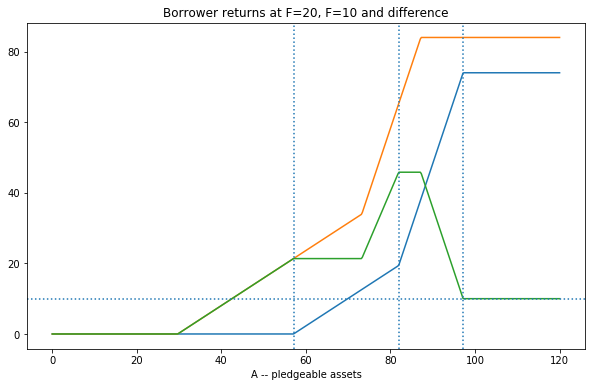

In [8]:
br1 = mfi.breturn(A,mfi.beta)       # borrower return in MFIs with F=20
mfi2 = Bank(A,mfi.beta)             
mfi2.F = 10
br2 = mfi2.breturn(A,mfi2.beta)     # borrower return in MFIs with F=10

plt.plot(A,br1)
plt.plot(A,br2)
plt.plot(A,br2-br1)                   # change in borrower return
plt.title('Borrower returns at F=20, F=10 and difference')
plt.xlabel('A -- pledgeable assets')
plt.axvline(x=mfi.Amin(mfi.beta), linestyle =':')
plt.axvline(x=mfi.Across(mfi.beta), linestyle =':')
plt.axvline(x=mfi.AM(0,mfi.beta), linestyle =':')
plt.axhline(y=mfi.F-mfi2.F,linestyle=':');     # dashed line at subsidy level (20=20-10)
     

**Analysis:**  

| Impact Group | description   | notes |
|------        |------        |-----    |
|  A  | previously excluded borrowers | only those with higher A get benefits > subsidy |
|  B  | existing no-leverage borrowers | benefit>subsidy|
|  C  | borrowers in transformed MFI |  leverage gives extra kick to subsidy, increasing with A |
|  D  | leveraged to direct borrowing|  impact greater than subsidy but declining with A|
|  E  | Group 4 --> Group 4 |  subsidy passed through 1 for 1 |


### Subsidy impact on number of borrowers:

We are looking at fixed-cost per loan F.  

$$ N = \frac{K}{I^m +F} $$

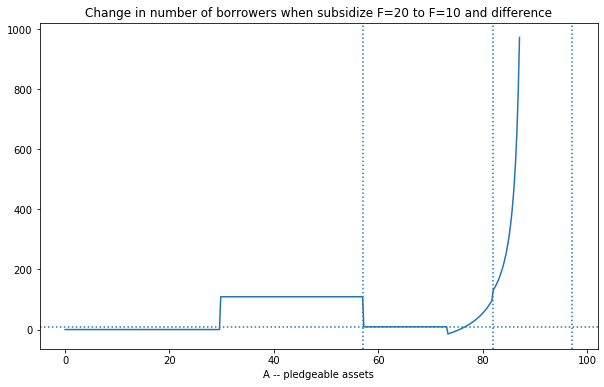

In [9]:
nr1 = mfi.nreach(A,mfi.beta)       #number borrowers in MFIs with F=20
nr2 = mfi2.nreach(A,mfi.beta)          #number borrowers in MFIs with F=10

#plt.plot(A,nr1)
#plt.plot(A,nr2)
plt.plot(A,nr2-nr1)                   # change in borrower return
plt.title('Change in number of borrowers when subsidize F=20 to F=10 and difference')
plt.xlabel('A -- pledgeable assets')
plt.axvline(x=mfi.Amin(mfi.beta), linestyle =':')
plt.axvline(x=mfi.Across(mfi.beta), linestyle =':')
plt.axvline(x=mfi.AM(0,mfi.beta), linestyle =':')
plt.axhline(y=mfi.F-mfi2.F,linestyle=':');     # dashed line at subsidy level (20=20-10)

Analysis:  Recall that K = 12000.  So a non-leveraged lender can reach $N = 12000/(100+F)$.  When $F=20$ they can reach 100 borrowers. When $F=10$ they can reach 109 borrowers. 

**Analysis:**  

| Impact Group | description   | notes |
|------        |------        |-----    |
|  A  | previously excluded borrowers | 109 new borrowers in each of these new MFIs |
|  B  | existing no-leverage borrowers | just 9 new borrowers per MFI |
|  C, D  | borrowers in transformed MFI |  increase leverage gets many new, increasing with A |


note: need to explain/fix weird small dip at end.